In [46]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"] = False

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import warnings
warnings.simplefilter('ignore')

international airline 데이터
-----------------------


In [48]:
df=pd.read_csv('../data/international-airline-passengers.csv')
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index)

- EDA 수행: 기술통계값 등

In [49]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


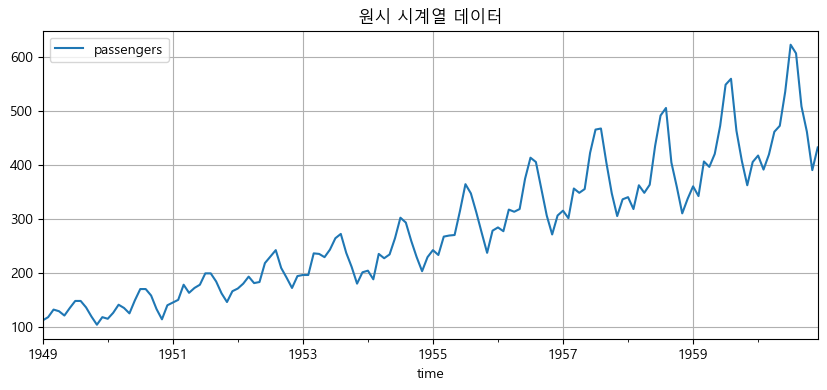

In [50]:

df.plot(title="원시 시계열 데이터", figsize=(10, 4))
plt.grid(True)
plt.show()

- acf, pacf 그래프 ,adfuller지수 시계열확인

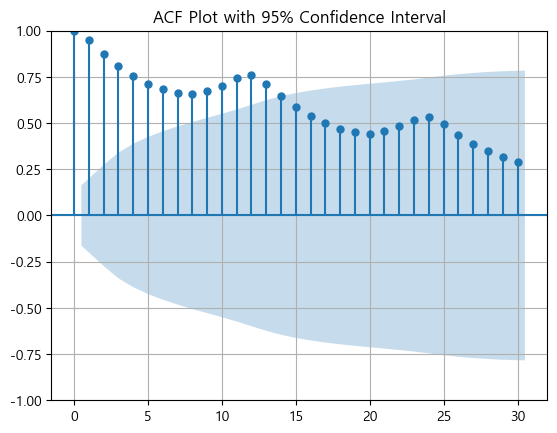

In [51]:
#  ACF 그래프 그리기
plot_acf(df, lags=30, alpha=0.05)
plt.title("ACF Plot with 95% Confidence Interval")
plt.grid(True)
plt.show()

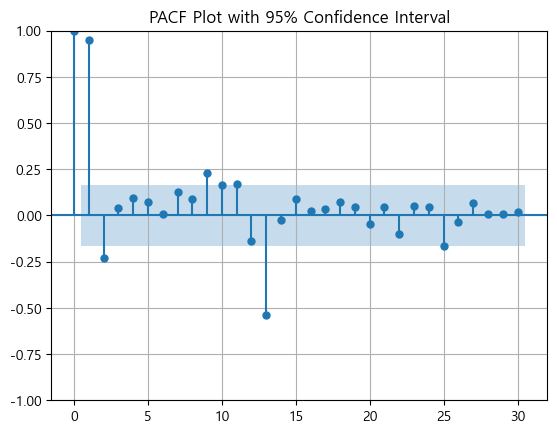

In [52]:
#  ACF 그래프 그리기
plot_pacf(df, lags=30, alpha=0.05)
plt.title("PACF Plot with 95% Confidence Interval")
plt.grid(True)
plt.show()

In [53]:
adf_result = adfuller(df)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("✅ 정상 시계열 (stationary)")
else:
    print("❌ 비정상 시계열 → 차분 필요")

ADF Statistic: 0.8153688792060441
p-value: 0.9918802434376409
❌ 비정상 시계열 → 차분 필요


- 시계열분해

In [54]:
df["MA_30"] = df["passengers"].rolling(window=30).mean()
df.dropna(inplace=True)
df["month"] = df.index.month


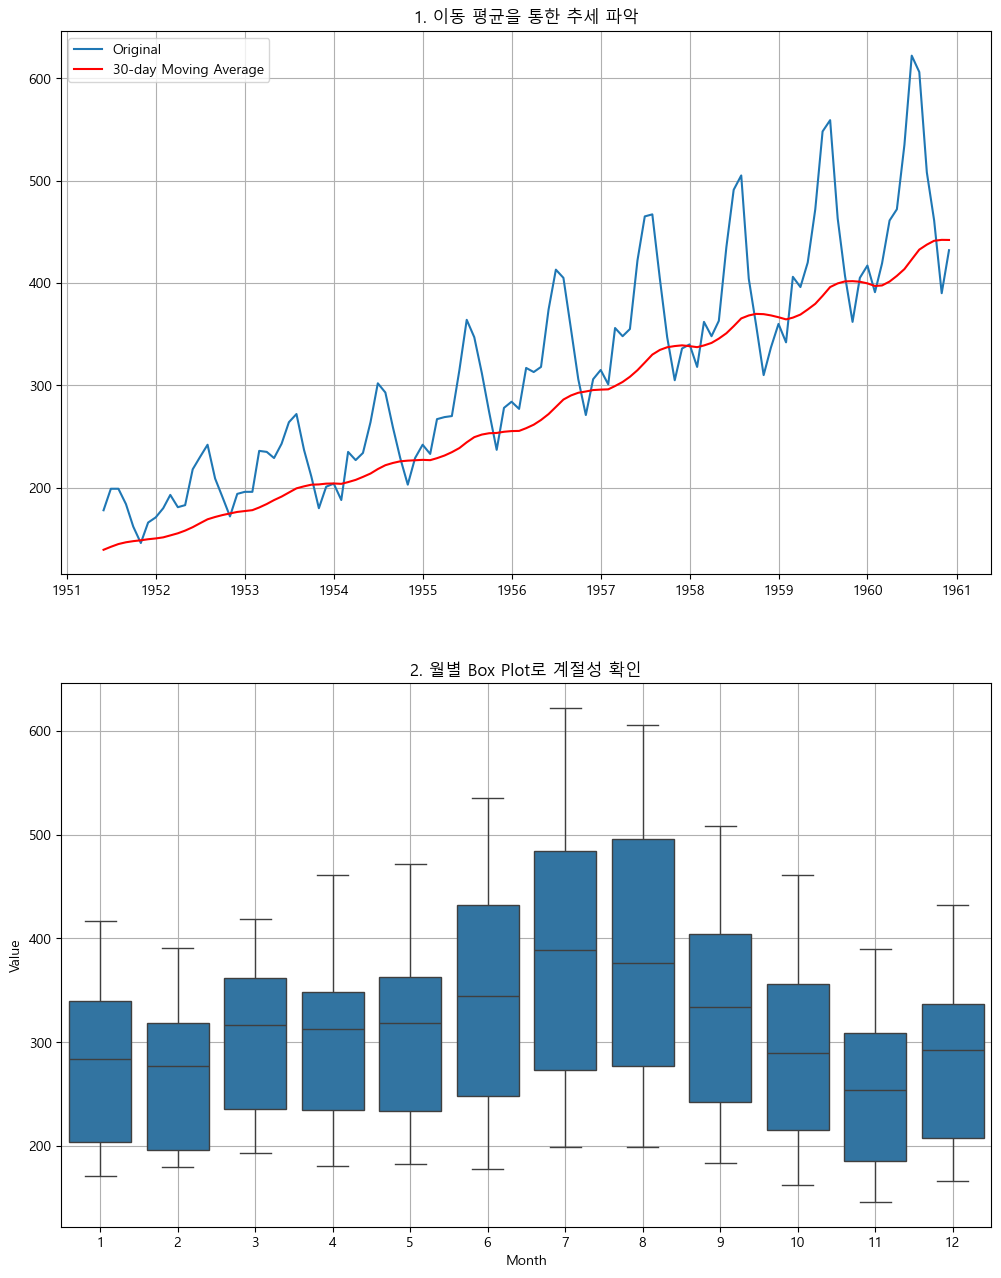

In [55]:

plt.figure(figsize=(12, 24))

plt.subplot(3,1,1)
plt.plot(df["passengers"], label="Original")
plt.plot(df["MA_30"], label="30-day Moving Average", color='red')
plt.title("1. 이동 평균을 통한 추세 파악")
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
sb.boxplot(x="month", y="passengers", data=df)
plt.title("2. 월별 Box Plot로 계절성 확인")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)


plt.show()


- ARIMA 이용 1년 예측

In [56]:
df=pd.read_csv('../data/international-airline-passengers.csv')
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index)
model = ARIMA(df, order=(2, 1, 2))
result = model.fit()

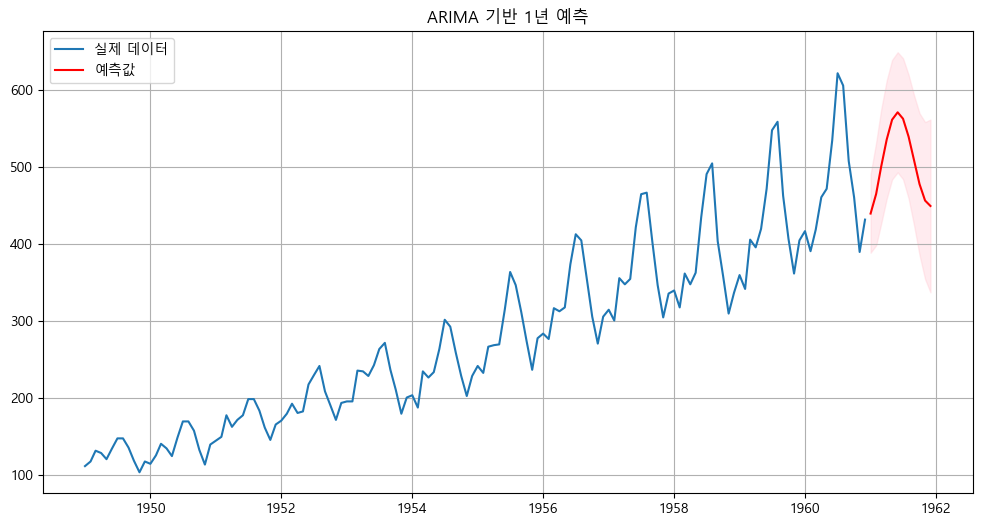

In [57]:
# 향후 12개월 예측
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['passengers'], label='실제 데이터')
plt.plot(forecast_mean.index, forecast_mean, label='예측값', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                 color='pink', alpha=0.3)
plt.title("ARIMA 기반 1년 예측")
plt.legend()
plt.grid(True)
plt.show()


- SARIMA 이용 1년 예측

In [58]:
model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

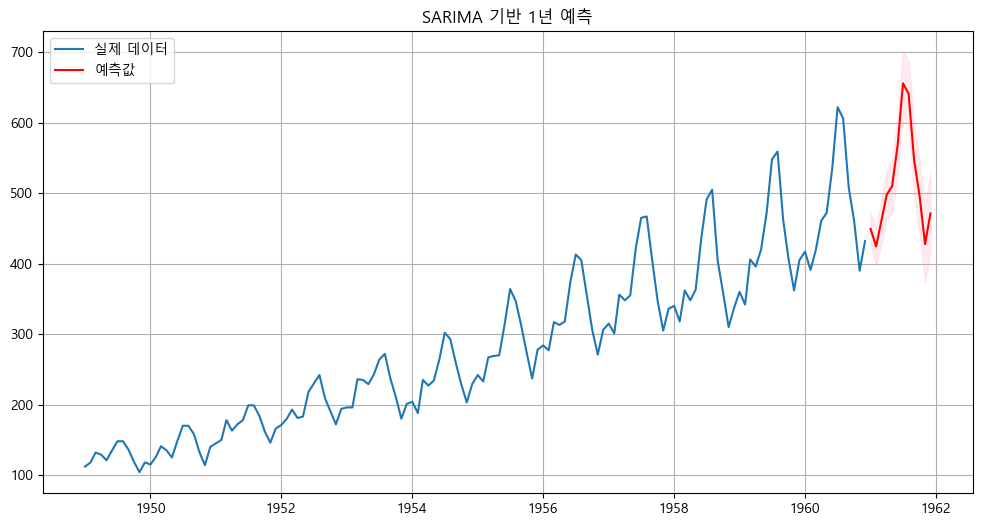

In [59]:
# 향후 12개월 예측
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['passengers'], label='실제 데이터')
plt.plot(forecast_mean.index, forecast_mean, label='예측값', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                 color='pink', alpha=0.3)
plt.title("SARIMA 기반 1년 예측")
plt.legend()
plt.grid(True)
plt.show()

- autoarim 이용 1년 예측

In [60]:
model = auto_arima(
    df,
    seasonal=True,
    m=20,  # 주기 설정 (여기선 sin 함수의 주기 20)
    stepwise=True,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[20] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[20] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[20] intercept   : AIC=1390.958, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[20] intercept   : AIC=1383.136, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[20]             : AIC=1413.909, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[20] intercept   : AIC=1398.827, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[20] intercept   : AIC=1383.448, Time=0.46 sec
 ARIMA(0,1,1)(0,0,2)[20] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,1,1)(1,0,0)[20] intercept   : AIC=1383.959, Time=0.33 sec
 ARIMA(0,1,1)(1,0,2)[20] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(0,1,0)(0,0,1)[20] intercept   : AIC=1398.080, Time=0.18 sec
 ARIMA(1,1,1)(0,0,1)[20] intercept   : AIC=1379.545, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[20] intercept   : AIC=1396.121, Time=0.17 sec
 ARIMA(1,1,1)(1,0,1)[20] intercept   : AIC=1379.998, Time=0.76 sec
 ARIMA(1,1,1)(0,0,2)[20] intercept

In [ ]:
# 향후 12개월 예측
forecast = model.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['passengers'], label='실제 데이터')
plt.plot(forecast_mean.index, forecast_mean, label='예측값', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                 color='pink', alpha=0.3)
plt.title("AutoARIMA 기반 1년 예측")
plt.legend()
plt.grid(True)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'get_forecast'